In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from typing import List

%matplotlib inline

In [2]:
house_df = pd.read_csv("clean_house_data.csv")
# df = house_df.loc[:, house_df.isnull().mean() < .8]
# df
house_df.columns

Index(['id', 'Zip', 'Price', 'Price of square meter', 'Building Cond. values',
       'Number of facades', 'Number of rooms', 'Living area', 'Furnished',
       'Kitchen values', 'Surface of the land', 'Primary energy consumption',
       'Energy_classes', 'Terrace', 'Terrace surface', 'Garden',
       'Garden surface', 'Open fire', 'Swimming pool'],
      dtype='object')

In [3]:
columns = ['id', 'Zip', 'Price', 'Price of square meter', 'Building Cond. values',
'Number of facades', 'Number of rooms', 'Living area', 'Furnished',
'Kitchen values', 'Surface of the land', 'Primary energy consumption',
'Energy_classes', 'Terrace', 'Terrace surface', 'Garden',
'Garden surface', 'Open fire', 'Swimming pool']

In [4]:
# Remove outliers
def remove_outliers(house_df: pd.DataFrame, columns: List[str], n_std: int) -> pd.DataFrame:
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = house_df[col].mean()
        sd = house_df[col].std()
        
        house_df = house_df[(house_df[col] <= mean+(n_std*sd))]
        
    return house_df

no_outliers_df = remove_outliers(house_df, columns, 3)

Working on column: id
Working on column: Zip
Working on column: Price
Working on column: Price of square meter
Working on column: Building Cond. values
Working on column: Number of facades
Working on column: Number of rooms
Working on column: Living area
Working on column: Furnished
Working on column: Kitchen values
Working on column: Surface of the land
Working on column: Primary energy consumption
Working on column: Energy_classes
Working on column: Terrace
Working on column: Terrace surface
Working on column: Garden
Working on column: Garden surface
Working on column: Open fire
Working on column: Swimming pool


In [ ]:
sns.pairplot(no_outliers_df)

In [6]:
X = no_outliers_df[columns]

y = no_outliers_df['Price']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [8]:
lm = LinearRegression() 

lm.fit(X_train,y_train)

LinearRegression()

In [9]:
# Now let’s evaluate the model by checking out its coefficients 
# and how we can interpret them.
print(lm.intercept_)

coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

1.1641532182693481e-09


In [ ]:
"""
Expected kind of output : 

Avg. Area Income : 21.528
Avg. Area House Age : 164883.28
Avg. Area Number of Rooms : 122368.67
Avg. Area Number of Bedrooms : 2233.80
Area Population : 15.15

What does coefficient of data says:

    Holding all other features fixed, a 1 unit increase in Avg. Area Income 
    is associated with an increase of $21.52 .
    Holding all other features fixed, a 1 unit increase in Avg. Area House Age 
    is associated with an increase of $164883.28 .
    Holding all other features fixed, a 1 unit increase in Avg. Area Number of Rooms 
    is associated with an increase of $122368.67 .
    Holding all other features fixed, a 1 unit increase in Avg. Area Number of Bedrooms 
    is associated with an increase of $2233.80 .
    Holding all other features fixed, a 1 unit increase in Area Population 
    is associated with an increase of $15.15 .
"""

In [10]:
predictions = lm.predict(X_test)  

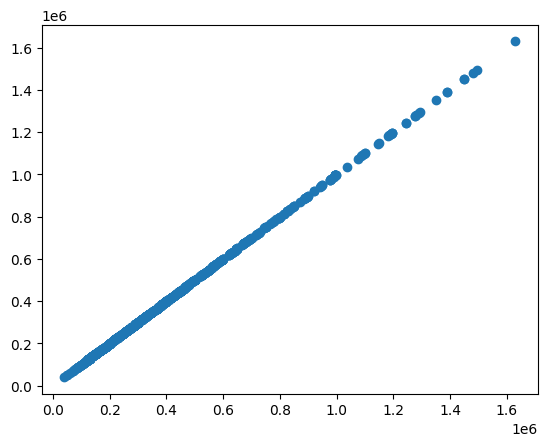

In [11]:
plt.scatter(y_test,predictions)
# Good prediction would appear as a line.

/tmp/ipykernel_2334/1948490303.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50)


<Axes: xlabel='Price', ylabel='Density'>

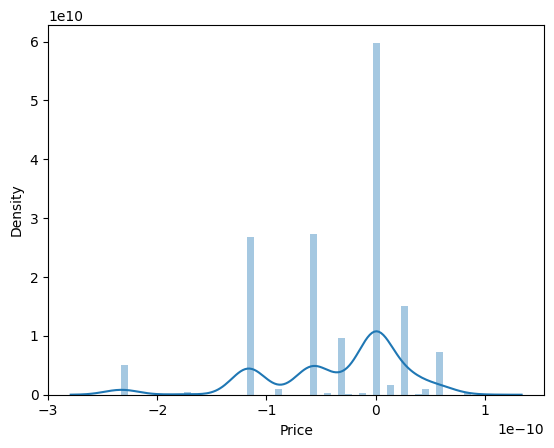

In [12]:
sns.distplot((y_test-predictions),bins=50)
# If the data is displayed in a bell shape, we did well

In [13]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

MAE: 4.67970262786779e-11


In [14]:
print('MSE:', metrics.mean_squared_error(y_test, predictions)) 

MSE: 5.128007006895528e-21


In [15]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) 

RMSE: 7.161010408381996e-11


In [ ]:
"""
Below is an example of how a sql based regression works
# Connect to the database
connection = pymysql.connect(
    host='localhost',
    user='username',
    password='password',
    database='database_name'
)

# Read data into a Pandas DataFrame
df = pd.read_sql('SELECT * FROM table_name', con=connection)

# Prepare the data
X = df[['feature_1', 'feature_2']]
y = df['price']

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X, y)

# Close the connection
connection.close()

"""